<a href="https://colab.research.google.com/github/iremgngr/Machine_Learning/blob/main/Polynomial_Regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
df = pd.read_csv("student.csv")

y = df[["Marks"]]
X = df[["time_study"]]

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [101]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [102]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_train_poly, y_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 3.538935555922957


In [104]:
y_pred_train = model.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 2.7837273737596573


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


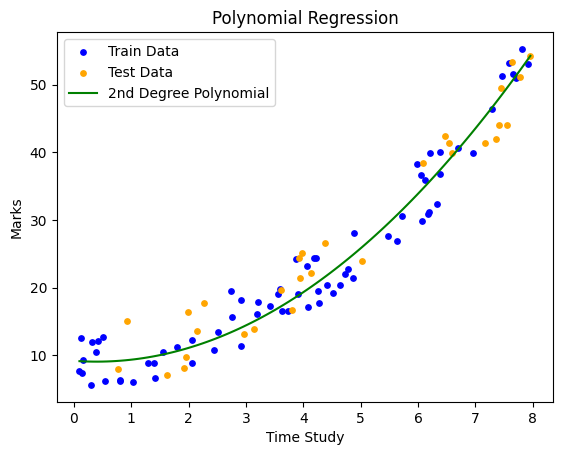

In [106]:
# X_grid
X_grid = np.linspace(min(X["time_study"]), max(X["time_study"]), 100).reshape(-1, 1)  #grafiğine bak
X_grid_scaled = scaler.transform(X_grid)

X_poly_grid = poly.fit_transform(X_grid_scaled)
y_grid_pred = model.predict(X_poly_grid)

plt.scatter(X_train, y_train, color='blue', label='Train Data', s=15)
plt.scatter(X_test, y_test, color='orange', label='Test Data', s=15)
plt.plot(X_grid, y_grid_pred, color='green', label='2nd Degree Polynomial')
plt.title('Polynomial Regression')
plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.legend()
plt.show()